In [1]:
# 数值计算
import numpy as np


# 绘图
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from imageio import imread

# 浏览器控制
from selenium import webdriver
from selenium.webdriver.common.by import By
import time

#网站解析
import requests, lxml
from bs4 import BeautifulSoup
import jieba

#自定义模块
import package.web as web

# 多线程
from threading import Thread


单个课程

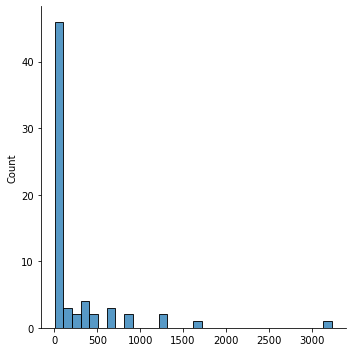

In [2]:
url = "https://icourse.club/course/21642/"

comments = web.GetComment(url)

# 评课长度分布直方图
LengthDistribution = list(map(len,comments))
sns.displot(LengthDistribution)
plt.show()

Building prefix dict from the default dictionary ...
Loading model from cache /var/folders/_r/s4ymnyp94kg4jf8pzqddcwmh0000gn/T/jieba.cache
Loading model cost 1.011 seconds.
Prefix dict has been built successfully.


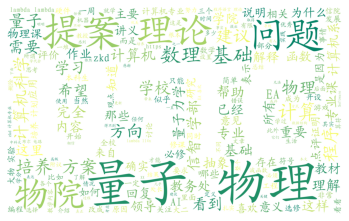

In [3]:
web.TheWordCloud(comments)

搜索某一课程（单进程）

In [73]:
# 获得一个搜索结果下的所有课程链接
links = web.SearchCourse('马克思主义基本原理')

In [ ]:
# all_course 保存所有链接下的课评
# 其中 GetComment 用以提取单个链接下的所有课评
all_course = list(map(web.GetComment,links))

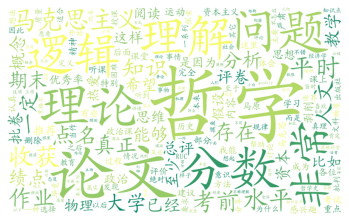

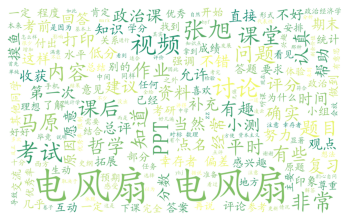

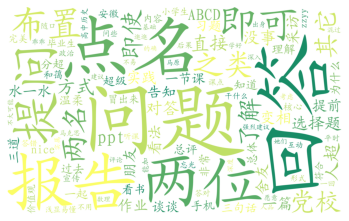

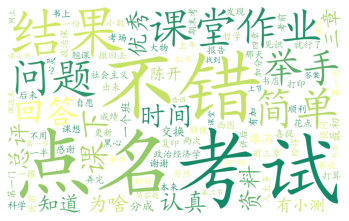

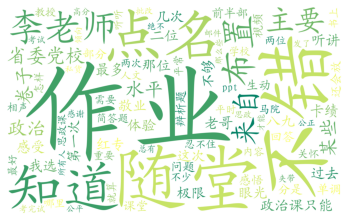

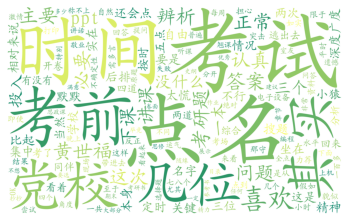

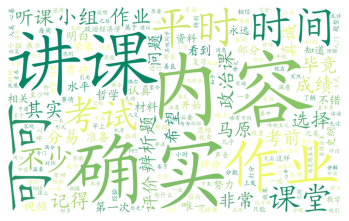

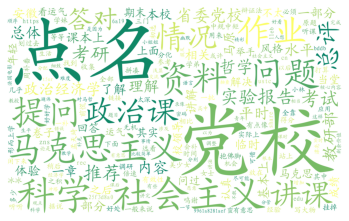

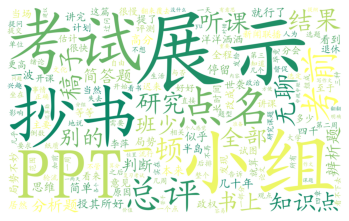

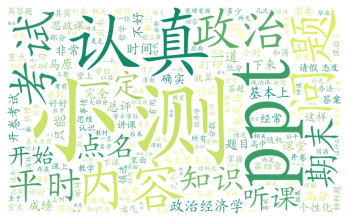

In [16]:
# 对每一个链接生成云图
clouds = list(map(web.TheWordCloud,all_course))

搜索某一课程，生成云图（多进程）

In [3]:
# 获得一个搜索结果下的所有课程链接
links = web.SearchCourse('马克思主义基本原理')

In [4]:
# 多线程获取一个搜索结果下每一个链接中的评课

# 多线程获得返回值的 CommentsThread 类
class CommentsThread(Thread):

    def __init__(self, url):
        Thread.__init__(self)
        self.url = url

    def run(self):
        self.result = web.GetComment(self.url)

    def get_result(self):
        return self.result



# 初始化线程
comments_thd = list(map(CommentsThread,links))

#多进程的开始与结束
for threads in comments_thd:
    threads.start()
for threads in comments_thd:
    threads.join()
    
# 综合一下结果
all_course_comments = []
for i in range(len(links)):
    all_course_comments.append(comments_thd[i].get_result())

len(all_course_comments)

10

In [5]:
# 多线程绘图 CloudThread 类
class CloudThread(Thread):

    def __init__(self, comments):
        Thread.__init__(self)
        self.comments = comments

    def run(self):
        self.result = web.TheWordCloud(self.comments)

    def get_result(self):
        return self.result

# 初始化线程
cloud_thd = list(map(CloudThread,all_course_comments))

Building prefix dict from the default dictionary ...
Loading model from cache /var/folders/_r/s4ymnyp94kg4jf8pzqddcwmh0000gn/T/jieba.cache
Loading model cost 0.885 seconds.
Prefix dict has been built successfully.


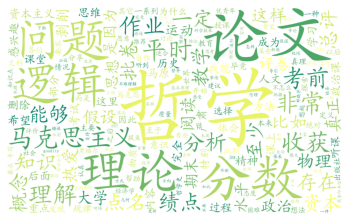

In [6]:
cloud_thd[0].start()
cloud_thd[0].join()

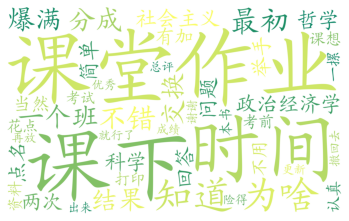

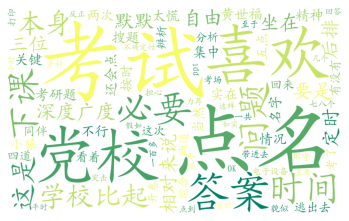

Exception in thread Thread-135:
Traceback (most recent call last):


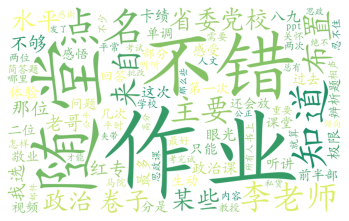

  File "/Users/royalty/opt/anaconda3/lib/python3.9/threading.py", line 973, in _bootstrap_inner
    self.run()
  File "/var/folders/_r/s4ymnyp94kg4jf8pzqddcwmh0000gn/T/ipykernel_75063/4119364675.py", line 11, in run
  File "/Users/royalty/Desktop/Python_ML/Python-DL/Web-Python/package/web.py", line 94, in TheWordCloud
    plt.imshow(a)
  File "/Users/royalty/opt/anaconda3/lib/python3.9/site-packages/matplotlib/_api/deprecation.py", line 456, in wrapper
    return func(*args, **kwargs)
  File "/Users/royalty/opt/anaconda3/lib/python3.9/site-packages/matplotlib/pyplot.py", line 2648, in imshow
    sci(__ret)
  File "/Users/royalty/opt/anaconda3/lib/python3.9/site-packages/matplotlib/pyplot.py", line 3020, in sci
    return gca()._sci(im)
  File "/Users/royalty/opt/anaconda3/lib/python3.9/site-packages/matplotlib/axes/_base.py", line 2150, in _sci
    raise ValueError("Argument must be an image, collection, or "
ValueError: Argument must be an image, collection, or ContourSet in this Axes

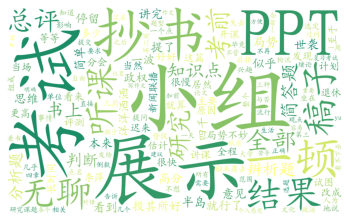

Exception in thread Thread-134:
Traceback (most recent call last):
  File "/Users/royalty/opt/anaconda3/lib/python3.9/threading.py", line 973, in _bootstrap_inner
    self.run()
  File "/var/folders/_r/s4ymnyp94kg4jf8pzqddcwmh0000gn/T/ipykernel_75063/4119364675.py", line 11, in run
  File "/Users/royalty/Desktop/Python_ML/Python-DL/Web-Python/package/web.py", line 94, in TheWordCloud
    plt.imshow(a)
  File "/Users/royalty/opt/anaconda3/lib/python3.9/site-packages/matplotlib/_api/deprecation.py", line 456, in wrapper
    return func(*args, **kwargs)
  File "/Users/royalty/opt/anaconda3/lib/python3.9/site-packages/matplotlib/pyplot.py", line 2648, in imshow
    sci(__ret)
  File "/Users/royalty/opt/anaconda3/lib/python3.9/site-packages/matplotlib/pyplot.py", line 3020, in sci
    return gca()._sci(im)
  File "/Users/royalty/opt/anaconda3/lib/python3.9/site-packages/matplotlib/axes/_base.py", line 2150, in _sci
    raise ValueError("Argument must be an image, collection, or "
ValueError

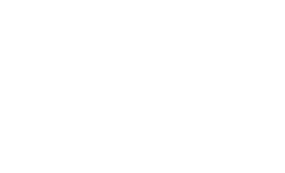

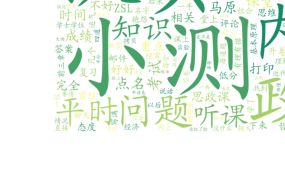

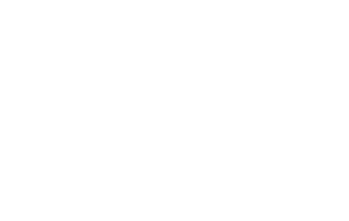

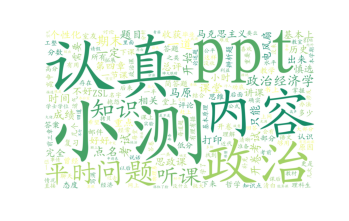

In [66]:
# 绘图多进程
for threads in cloud_thd:
    threads.start()

for threads in cloud_thd:
    threads.join()